Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
First 5 rows of dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414           

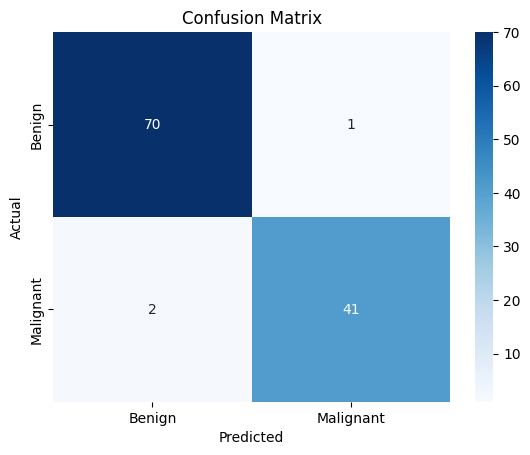

Precision: 0.9762
Recall: 0.9535
ROC-AUC: 0.9974


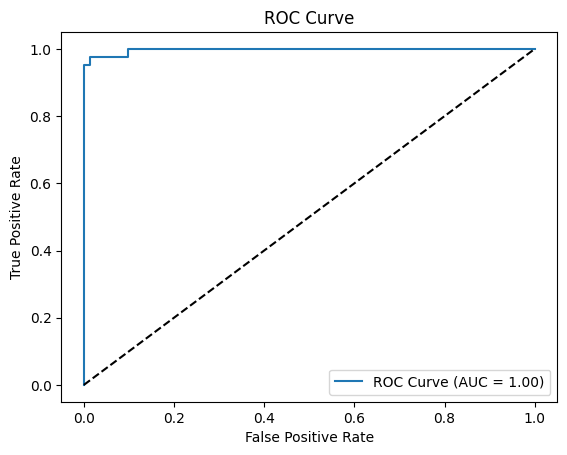

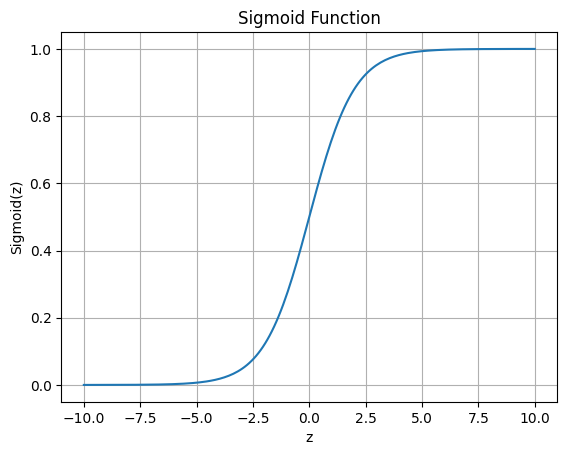


Classification Report with Threshold = 0.4
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [3]:
# ============================================
# Task 4: Logistic Regression Binary Classifier
# Dataset: Breast Cancer Wisconsin (Diagnostic)
# ============================================

# ---- STEP 1: Mount Google Drive ----
from google.colab import drive
drive.mount('/content/drive')

# ---- STEP 2: Import Libraries ----
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score

# ---- STEP 3: Load Dataset from Drive ----
# Change path to your copied file path from Google Drive
dataset_path = "/content/drive/MyDrive/DDataset/data.csv"
df = pd.read_csv(dataset_path)

print("First 5 rows of dataset:")
print(df.head())

# ---- STEP 4: Data Preprocessing ----
# Drop unnecessary columns
df = df.drop(['id', 'Unnamed: 32'], axis=1)

# Encode target variable (M = 1, B = 0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# ---- STEP 5: Train/Test Split ----
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- STEP 6: Standardize Features ----
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---- STEP 7: Train Logistic Regression ----
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# ---- STEP 8: Predictions ----
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

# ---- STEP 9: Evaluation Metrics ----
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# ---- STEP 10: ROC Curve ----
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# ---- STEP 11: Sigmoid Function Plot ----
z = np.linspace(-10, 10, 200)
sigmoid = 1 / (1 + np.exp(-z))
plt.plot(z, sigmoid)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.grid(True)
plt.show()

# ---- STEP 12: Threshold Tuning Example ----
custom_threshold = 0.4
y_pred_custom = (y_pred_prob >= custom_threshold).astype(int)
print(f"\nClassification Report with Threshold = {custom_threshold}")
print(classification_report(y_test, y_pred_custom))
